# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [14]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [15]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"Not Verified | Good points, the cabin crew, t..."
1,"Not Verified | It was a decent flight, reason..."
2,✅ Trip Verified | I really like flying Briti...
3,✅ Trip Verified | Could not book online the ...
4,✅ Trip Verified | Having had some rough experi...


In [5]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [17]:
#  Clean the duplicates in DataFrame
clean_df = df.drop_duplicates()
clean_df.shape

(1000, 1)

# Data Cleaning

In [18]:
remove_text =  ['✅ Trip Verified', 'Not Verified |']

for i in range(len(df['reviews'])):
  for j in remove_text:
    if j in df['reviews'][i]:
      df['reviews'] = df['reviews'].str.replace(j, '')

df.head()

,reviews
0,"Good points, the cabin crew, they were helpf..."
1,"It was a decent flight, reasonable comfortab..."
2,| I really like flying British Airways part...
3,| Could not book online the night before be...
4,| Having had some rough experiences with BA i...


In [25]:
import re, string
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def cleaningText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
  text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
  text = re.sub(r'RT[\s]', '', text) # remove RT
  text = re.sub(r"http\S+", '', text) # remove link
  text = re.sub(r'[0-9]+', '', text) # remove numbers
  text = re.sub(r'[^\w\s]', '', text) # remove numbers

  text = text.replace('\n', ' ') # replace new line into space
  text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
  text = text.strip(' ') # remove characters space from both left and right text
  return text


def casefoldingText(text):
  text = text.lower()
  return text


def tokenizingText(text):
  text = word_tokenize(text)
  return text

def filteringText(text):
  listStopwords = set(stopwords.words('english'))
  filtered_text = [word for word in text if word.lower() not in listStopwords]
  return text


def stemmingText(text):
    stemmer = PorterStemmer()
    stems = [stemmer.stem(word) for word in text]
    return stems


def toSentence(list_words):
  sentence = ' '.join(word for word in list_words)
  return sentence



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [20]:
slangwords = {
    "ba": "british airways",
    "biz": "business",
    "tix": "tickets",
    "lhr": "london heathrow",
    "jfk": "john f kennedy airport",
    "svc": "service",
    "atm": "at the moment",
    "cust": "customer",
    "dep": "departure",
    "arr": "arrival",
    "del": "delay",
    "sec": "security",
    "bagg": "baggage",
    "info": "information",
    "intl": "international",
    "dom": "domestic",
    "econ": "economy",
    "bizclass": "business class",
    "fclass": "first class",
    "crew": "crew",
    "seatback": "seat back",
    "chk": "check",
    "immig": "immigration",
    "annc": "announcement",
    "layover": "transit",
    "rebook": "rebook",
    "overbooked": "over booked",
    "unboard": "disembark",
    "entmt": "entertainment",
    "snk": "snack",
    "bvg": "beverage",
    "fa": "flight attendant",
    "ca": "cabin attendant",
    "iata": "international air transport association",
    "pts": "points",
    "redeem": "redeem",
    "gatecrash": "gate crash",
    "dnd": "do not disturb",
    "pax": "passenger",
    "dep gate": "departure gate",
    "arr gate": "arrival gate",
    "onboard": "on board",
    "ba lounge": "british airways lounge",
    "loungeaccess": "lounge access",
}


In [21]:
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text


In [23]:
df

,reviews
0,"Good points, the cabin crew, they were helpf..."
1,"It was a decent flight, reasonable comfortab..."
2,| I really like flying British Airways part...
3,| Could not book online the night before be...
4,| Having had some rough experiences with BA i...
...,...
995,| Flying London City to Geneva. The only plus...
996,| Los Angeles to Istanbul via London. Flight...
997,| Phoenix to Tel Aviv via London. The return ...
998,London to Kefalonia . The T5 Galleries loung...


In [26]:

df['text_clean'] =  df['reviews'].apply(cleaningText)
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)
df['text_stems'] = df['text_stopword'].apply(stemmingText)
df['text_akhir'] = df['text_stopword'].apply(toSentence)

In [27]:
df

,reviews,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_stems,text_akhir
0,"Good points, the cabin crew, they were helpf...",Good points the cabin crew they were helpful p...,good points the cabin crew they were helpful p...,good points the cabin crew they were helpful p...,"[good, points, the, cabin, crew, they, were, h...","[good, points, the, cabin, crew, they, were, h...","[good, point, the, cabin, crew, they, were, he...",good points the cabin crew they were helpful p...
1,"It was a decent flight, reasonable comfortab...",It was a decent flight reasonable comfortable ...,it was a decent flight reasonable comfortable ...,it was a decent flight reasonable comfortable ...,"[it, was, a, decent, flight, reasonable, comfo...","[it, was, a, decent, flight, reasonable, comfo...","[it, wa, a, decent, flight, reason, comfort, s...",it was a decent flight reasonable comfortable ...
2,| I really like flying British Airways part...,I really like flying British Airways particula...,i really like flying british airways particula...,i really like flying british airways particula...,"[i, really, like, flying, british, airways, pa...","[i, really, like, flying, british, airways, pa...","[i, realli, like, fli, british, airway, partic...",i really like flying british airways particula...
3,| Could not book online the night before be...,Could not book online the night before beca...,could not book online the night before beca...,could not book online the night before because...,"[could, not, book, online, the, night, before,...","[could, not, book, online, the, night, before,...","[could, not, book, onlin, the, night, befor, b...",could not book online the night before because...
4,| Having had some rough experiences with BA i...,Having had some rough experiences with BA in r...,having had some rough experiences with ba in r...,having had some rough experiences with british...,"[having, had, some, rough, experiences, with, ...","[having, had, some, rough, experiences, with, ...","[have, had, some, rough, experi, with, british...",having had some rough experiences with british...
...,...,...,...,...,...,...,...,...
995,| Flying London City to Geneva. The only plus...,Flying London City to Geneva The only plus was...,flying london city to geneva the only plus was...,flying london city to geneva the only plus was...,"[flying, london, city, to, geneva, the, only, ...","[flying, london, city, to, geneva, the, only, ...","[fli, london, citi, to, geneva, the, onli, plu...",flying london city to geneva the only plus was...
996,| Los Angeles to Istanbul via London. Flight...,Los Angeles to Istanbul via London Flight betw...,los angeles to istanbul via london flight betw...,los angeles to istanbul via london flight betw...,"[los, angeles, to, istanbul, via, london, flig...","[los, angeles, to, istanbul, via, london, flig...","[lo, angel, to, istanbul, via, london, flight,...",los angeles to istanbul via london flight betw...
997,| Phoenix to Tel Aviv via London. The return ...,Phoenix to Tel Aviv via London The return from...,phoenix to tel aviv via london the return from...,phoenix to tel aviv via london the return from...,"[phoenix, to, tel, aviv, via, london, the, ret...","[phoenix, to, tel, aviv, via, london, the, ret...","[phoenix, to, tel, aviv, via, london, the, ret...",phoenix to tel aviv via london the return from...
998,London to Kefalonia . The T5 Galleries loung...,London to Kefalonia The T Galleries lounge is...,london to kefalonia the t galleries lounge is...,london to kefalonia the t galleries lounge is ...,"[london, to, kefalonia, the, t, galleries, lou...","[london, to, kefalonia, the, t, galleries, lou...","[london, to, kefalonia, the, t, galleri, loung...",london to kefalonia the t galleries lounge is ...


In [31]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inisialisasi analyzer
analyzer = SentimentIntensityAnalyzer()

# Fungsi untuk mendapatkan skor compound
def vaderSentiment(text):
    vs = analyzer.polarity_scores(text)
    return vs['compound']

# Fungsi untuk klasifikasi berdasarkan skor
def sentiment_category(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply vaderSentiment function to the 'text_akhir' column to calculate sentiment scores
df['Sentiment'] = df['text_akhir'].apply(vaderSentiment)

df['Analysis'] = df['Sentiment'].apply(sentiment_category)
df.head()

,reviews,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_stems,text_akhir,Sentiment,Analysis
0,"Good points, the cabin crew, they were helpf...",Good points the cabin crew they were helpful p...,good points the cabin crew they were helpful p...,good points the cabin crew they were helpful p...,"[good, points, the, cabin, crew, they, were, h...","[good, points, the, cabin, crew, they, were, h...","[good, point, the, cabin, crew, they, were, he...",good points the cabin crew they were helpful p...,0.5625,Positive
1,"It was a decent flight, reasonable comfortab...",It was a decent flight reasonable comfortable ...,it was a decent flight reasonable comfortable ...,it was a decent flight reasonable comfortable ...,"[it, was, a, decent, flight, reasonable, comfo...","[it, was, a, decent, flight, reasonable, comfo...","[it, wa, a, decent, flight, reason, comfort, s...",it was a decent flight reasonable comfortable ...,0.4010,Positive
2,| I really like flying British Airways part...,I really like flying British Airways particula...,i really like flying british airways particula...,i really like flying british airways particula...,"[i, really, like, flying, british, airways, pa...","[i, really, like, flying, british, airways, pa...","[i, realli, like, fli, british, airway, partic...",i really like flying british airways particula...,0.9688,Positive
3,| Could not book online the night before be...,Could not book online the night before beca...,could not book online the night before beca...,could not book online the night before because...,"[could, not, book, online, the, night, before,...","[could, not, book, online, the, night, before,...","[could, not, book, onlin, the, night, befor, b...",could not book online the night before because...,-0.4767,Negative
4,| Having had some rough experiences with BA i...,Having had some rough experiences with BA in r...,having had some rough experiences with ba in r...,having had some rough experiences with british...,"[having, had, some, rough, experiences, with, ...","[having, had, some, rough, experiences, with, ...","[have, had, some, rough, experi, with, british...",having had some rough experiences with british...,0.9099,Positive


In [32]:
vader_counts = df['Analysis'].value_counts()
vader_counts

,count
Analysis,
Negative,524
Positive,458
Neutral,18


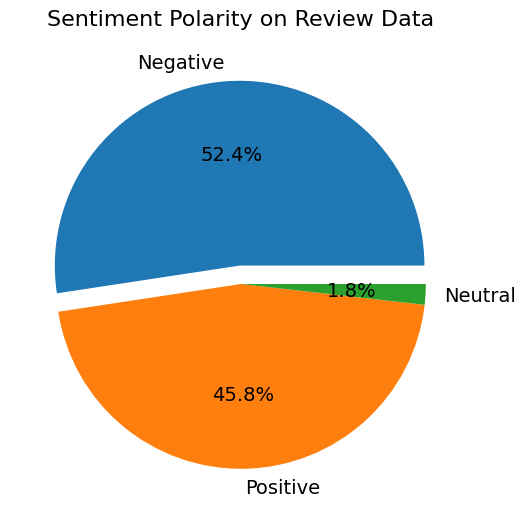

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in df['Analysis'].value_counts()]
labels = list(df['Analysis'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x=sizes, labels=labels,  autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)
plt.show()

In [34]:
df.to_csv("Cleaned British Airways Reviews.csv")

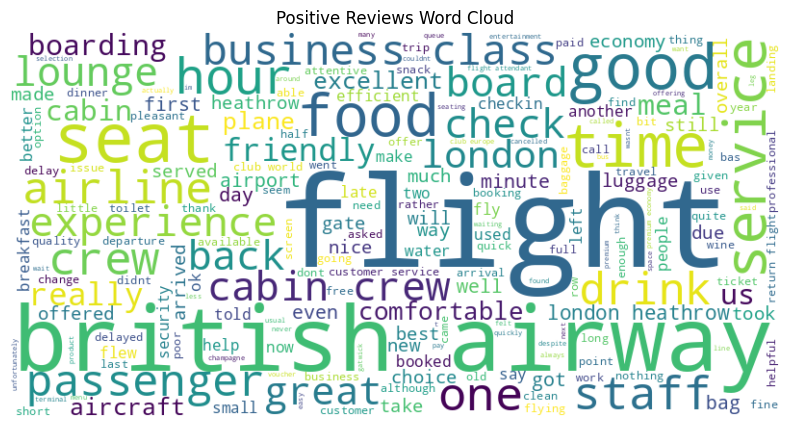

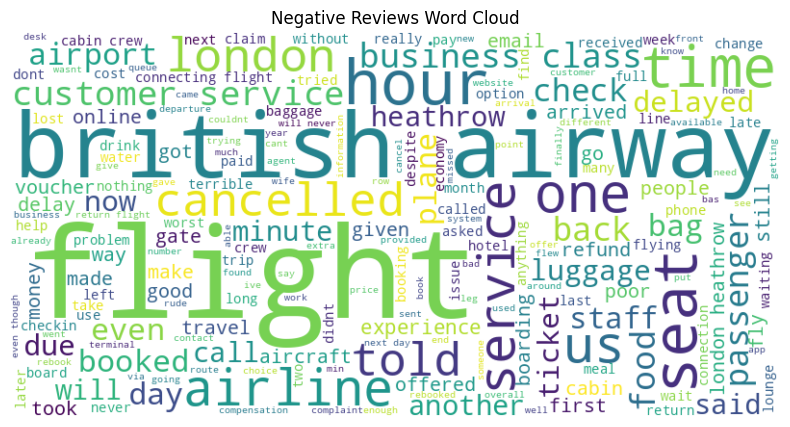

In [40]:

!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataframe
df = pd.read_csv('Cleaned British Airways Reviews.csv')

# Separate positive and negative reviews
positive_reviews = df[df['Analysis'] == 'Positive']['text_akhir']
negative_reviews = df[df['Analysis'] == 'Negative']['text_akhir']


# Generate word cloud for positive reviews
positive_text = ' '.join(review for review in positive_reviews)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()


# Generate word cloud for negative reviews
negative_text = ' '.join(review for review in negative_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()
